In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
data_1=pd.read_excel("E:/Tipdm/data/cumcm2018c1.xlsx")
data_2=pd.read_csv("E:/Tipdm/data/cumcm2018c2.csv",engine='python',
                   encoding='utf8').dropna(axis=0,subset=['dtime'])

data_1_1=data_1[['kh','djsj']].dropna(axis=0,subset=['djsj'])
data_2_1=data_2[['kh','je','djh']]
data=pd.merge(data_1_1,data_2_1,on='kh')
data_cp=data.copy()
data_cp.loc[:,'djsj']=pd.to_datetime(data['djsj'],format='%Y/%m/%d %H:%M:%S.%f',errors='coerce')
data_cp['djsj']=data_cp['djsj'].dt.year
data_cp['入会时间']=2020-data_cp['djsj']
L=data_cp[['kh','入会时间']]
print(data_cp.head())

         kh  djsj        je   djh  入会时间
0  a37cc182  2004    297.07  7cd8    16
1  a37cc182  2004  11089.93  7cd8    16
2  a37cc182  2004    598.00  ed0a    16
3  34c2dc93  2007    260.00  c3f4    13
4  828aa9b4  2004   1288.00  95b0    16


In [6]:
F=data_cp[['kh','djh']].groupby('kh').count().reset_index()
F_1=F[['kh','djh']]                #获取消费次数

M=data_cp[['kh','je']].groupby('kh').sum().reset_index()
M_1=M[['kh','je']]                      #获取消费金额

data_a=pd.merge(L,F,on='kh',how='inner')
data_b=pd.merge(data_a,M,on='kh',how='inner')
data_b=data_b.rename(columns={'kh':'卡号','djh':'消费次数','je':'消费金额'})
print(data_b.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 474547 entries, 0 to 474546
Data columns (total 4 columns):
卡号      474547 non-null object
入会时间    474547 non-null int64
消费次数    474547 non-null int64
消费金额    474547 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 18.1+ MB
None


In [7]:
data_future=data_b[['入会时间','消费次数','消费金额']]
data_b_SC=StandardScaler().fit_transform(data_future)
KMeans_model=KMeans(n_clusters=3)
fit_model=KMeans_model.fit(data_b_SC)        #训练聚类模型
print(KMeans_model.cluster_centers_)

[[-0.53497667 -0.0645084  -0.04615276]
 [-1.08099461 11.53756568 10.42727611]
 [ 1.3344114  -0.10045075 -0.12053505]]


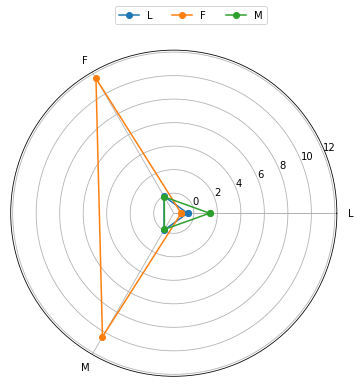

In [8]:
angles=np.linspace(0,2*np.pi,3,endpoint=False)     #将园根据标签的个数等比分
angles=np.concatenate((angles,[angles[0]]))        #闭合
centers=KMeans_model.cluster_centers_             #获取聚类中心数据
plt_data=np.concatenate((centers,centers[:,[0]]),axis=1)
label=['L','F','M']
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,polar=True)
for i in range(len(plt_data)):
    ax.plot(angles,plt_data[i],'o-',label=label[i])
ax.set_thetagrids(angles*180/np.pi,label)
plt.legend(bbox_to_anchor=(0.8,1.15),ncol=3)
plt.show()